# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data.
import seaborn as sns # Mengimpor pustaka seaborn untuk visualisasi grafik.
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik.
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow.
from sklearn.cluster import KMeans  # Mengimpor algoritma KMeans untuk clustering.
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering.
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Mengimpor StandardScaler dan MinMaxScaler untuk normalisasi data.
from sklearn.preprocessing import LabelEncoder  # Mengimpor LabelEncoder untuk encoding data kategorikal.
from sklearn.decomposition import PCA  # Mengimpor PCA untuk reduksi dimensi.
from google.colab import drive  # Mengimpor drive dari google.colab untuk mengakses Google Drive.

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Mount Google Drive ke Google Colab agar dapat mengakses file di dalamnya
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Membaca dataset dan menampilkan 5 baris pertama
df = pd.read_csv('/content/drive/MyDrive/Dataset_inisiasi.csv')
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 4.1 Memahami Struktur Data

In [4]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [5]:
# # Ambil subset acak (100.000 baris) karena dataset terlalu besar, lalu tampilkan info dataframe.
df = df.sample(n=100000, random_state=69, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       100000 non-null  object 
 1   Customer_ID    100000 non-null  object 
 2   Customer_Type  100000 non-null  object 
 3   Product        100000 non-null  object 
 4   Category       100000 non-null  object 
 5   Unit_Price     100000 non-null  float64
 6   Quantity       100000 non-null  int64  
 7   Discount       100000 non-null  float64
 8   Total_Price    100000 non-null  float64
 9   Region         100000 non-null  object 
 10  Order_Date     100000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 8.4+ MB


In [6]:
# Tinjau jumlah baris dan kolom dalam dataset
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

Jumlah baris: 100000, Jumlah kolom: 11


In [7]:
# Tinjau jenis data di setiap kolom (numerikal atau kategorikal)
print(df.dtypes)

Order_ID          object
Customer_ID       object
Customer_Type     object
Product           object
Category          object
Unit_Price       float64
Quantity           int64
Discount         float64
Total_Price      float64
Region            object
Order_Date        object
dtype: object


## 4.2 Menangani Data yang Hilang

In [8]:
# Mengecek jumlah data yang hilang di setiap kolom
df.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


## 4.3 Analisis Distribusi dan Korelasi Data Numerik

In [9]:
# Menampilkan ringkasan statistik dari DataFrame
df.describe().round(3)

,Unit_Price,Quantity,Discount,Total_Price
count,100000.000,100000.000,100000.000,100000.000
mean,5.774,23.237,0.030,132.580
std,14.553,26.930,0.045,524.242
min,0.320,1.000,0.000,0.320
25%,1.050,6.000,0.000,8.400
50%,1.750,11.000,0.000,21.140
75%,3.210,31.000,0.050,70.212
max,159.800,100.000,0.150,12817.750


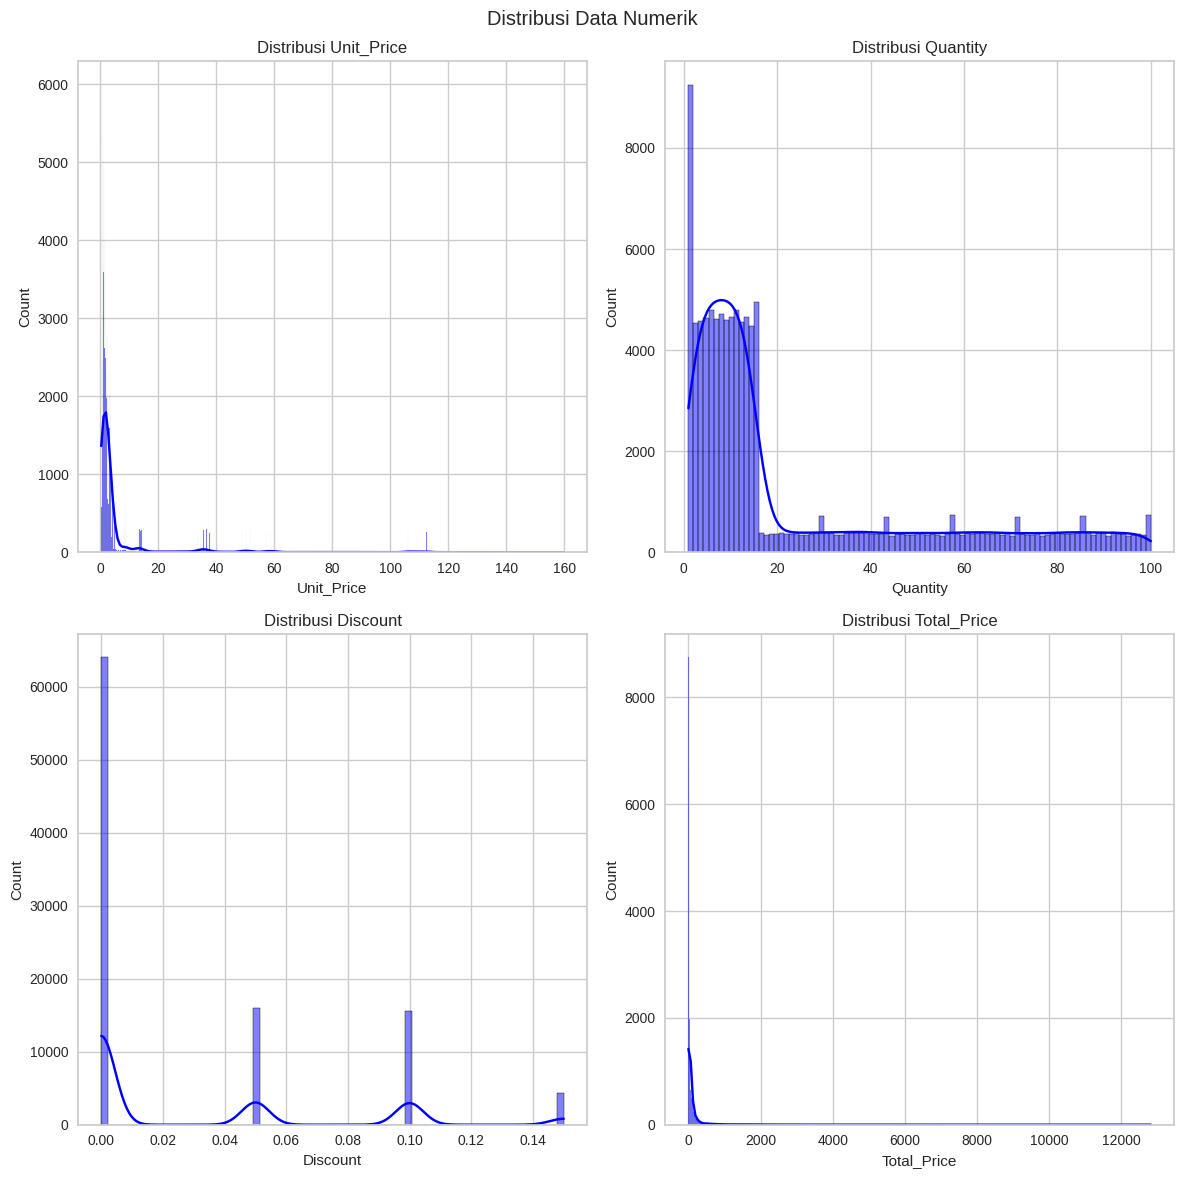

In [10]:
# Pilih kolom numerik dari DataFrame
numeric_col = df.select_dtypes(include=['number']).columns

# Buat figure dengan 4 subplot dalam format 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Looping untuk membuat histogram pada setiap kolom numerik
for i, col in enumerate(numeric_col):
    ax = axes[i//2, i%2]
    sns.histplot(df[col], ax=ax, kde=True, color='blue')
    ax.set_title(f'Distribusi {col}')

# Tambahkan judul utama dan atur tata letak agar lebih rapi
plt.suptitle("Distribusi Data Numerik")
plt.tight_layout()
plt.show()

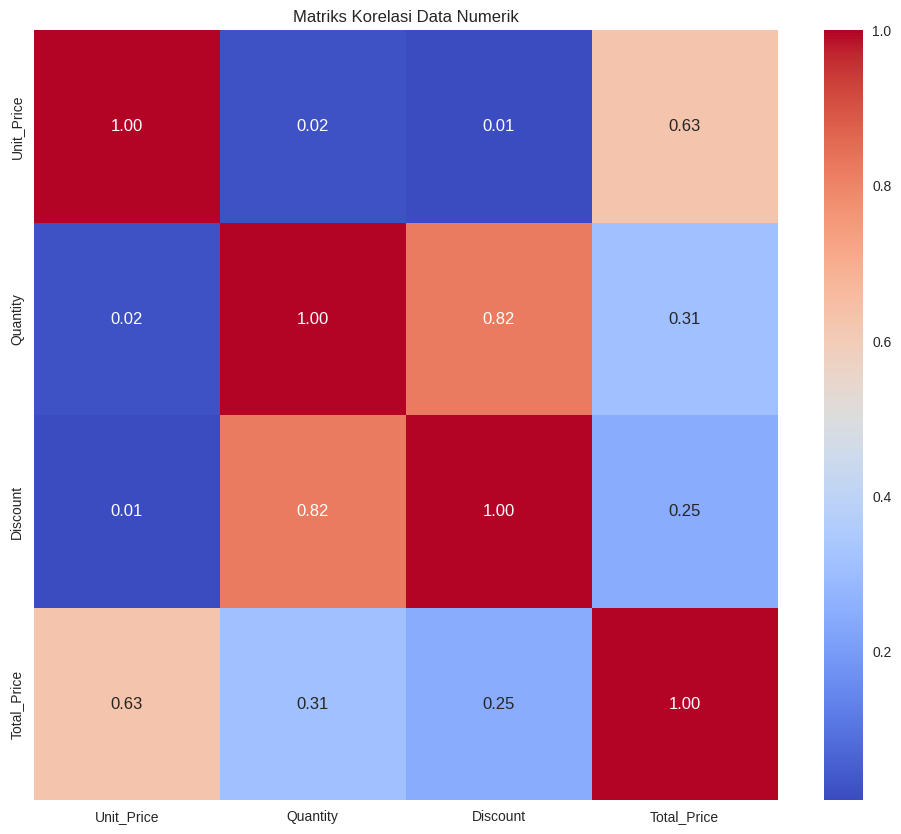

In [11]:
# Membuat heatmap untuk menampilkan korelasi antar kolom numerik dalam dataframe
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Data Numerik')
plt.show()

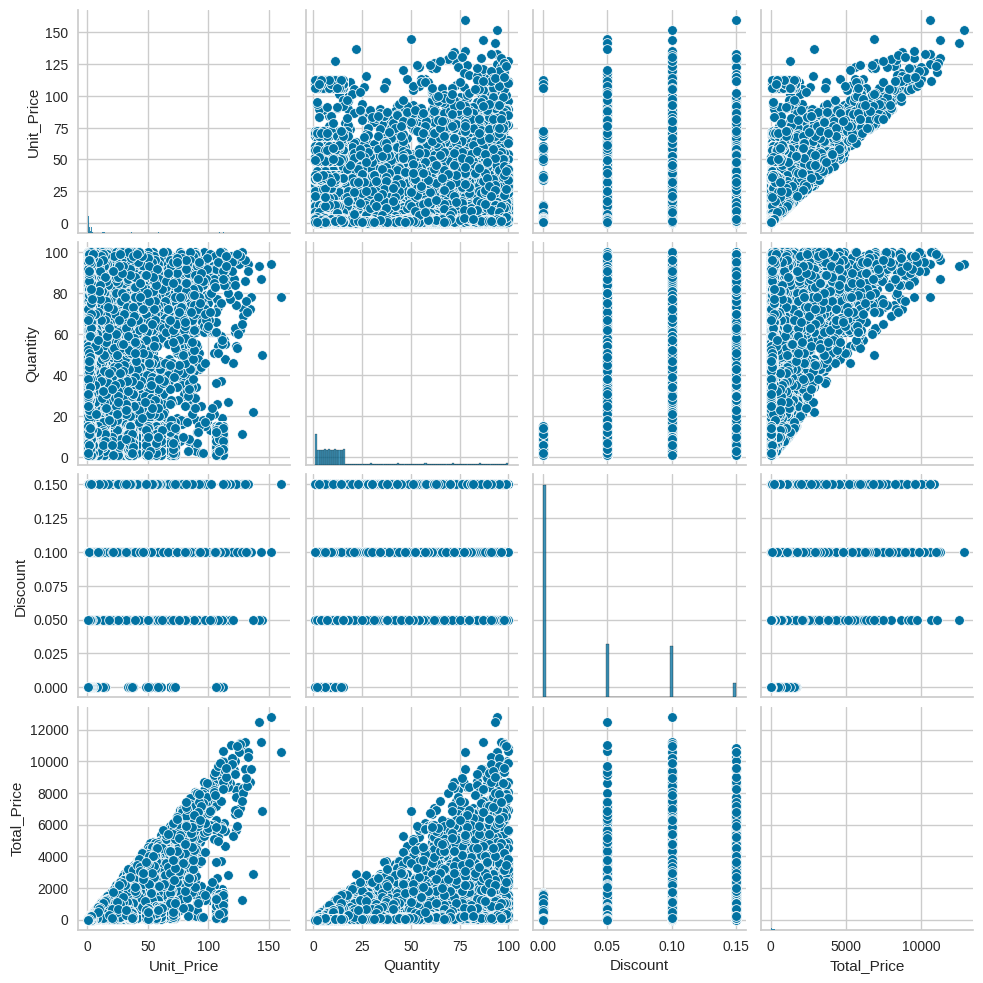

In [12]:
# Buat pairplot dan tampilkan untuk melihat hubungan antara variabel numerik
sns.pairplot(df[numeric_col])
plt.show()

## 4.4 Visualisasi Distribusi Data Kategorikal

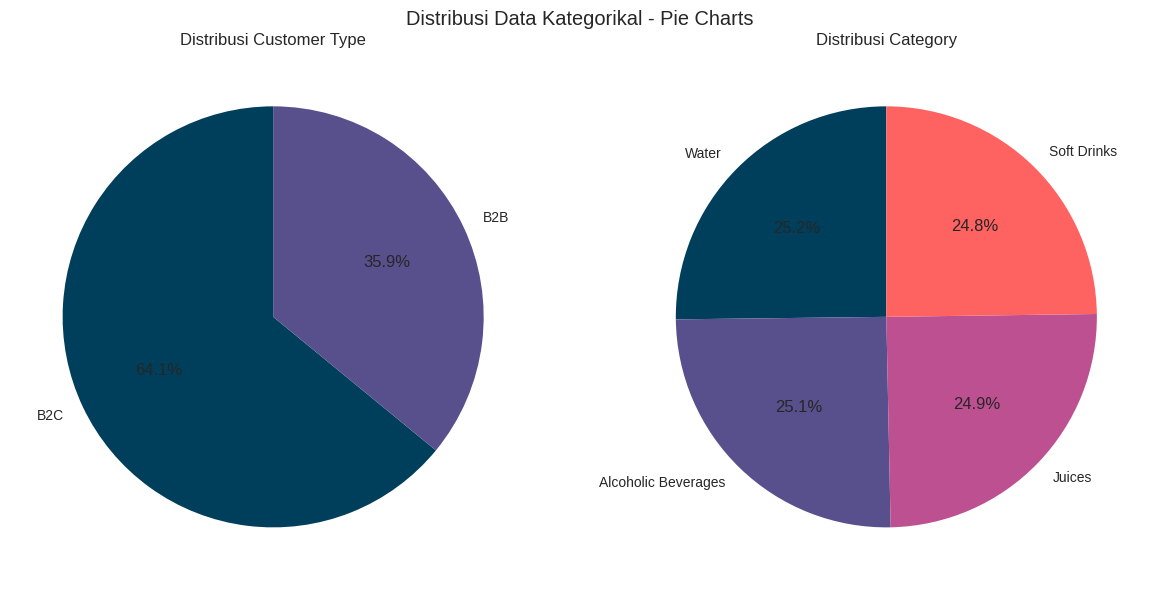

In [13]:
# Bar chart distribusi customer type & distribusi category
customer_type_count = df['Customer_Type'].value_counts()
category_count = df['Category'].value_counts()

# Warna yang digunakan
colors_pie1 = ['#003f5c','#58508d']
colors_pie2 = ['#003f5c','#58508d', '#bc5090', '#ff6361']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].pie(customer_type_count, labels=customer_type_count.index, autopct='%1.1f%%', startangle=90, colors=colors_pie1)
ax[0].set_title("Distribusi Customer Type")
ax[1].pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=90, colors=colors_pie2)
ax[1].set_title("Distribusi Category")
plt.suptitle("Distribusi Data Kategorikal - Pie Charts")
plt.tight_layout()
plt.show()

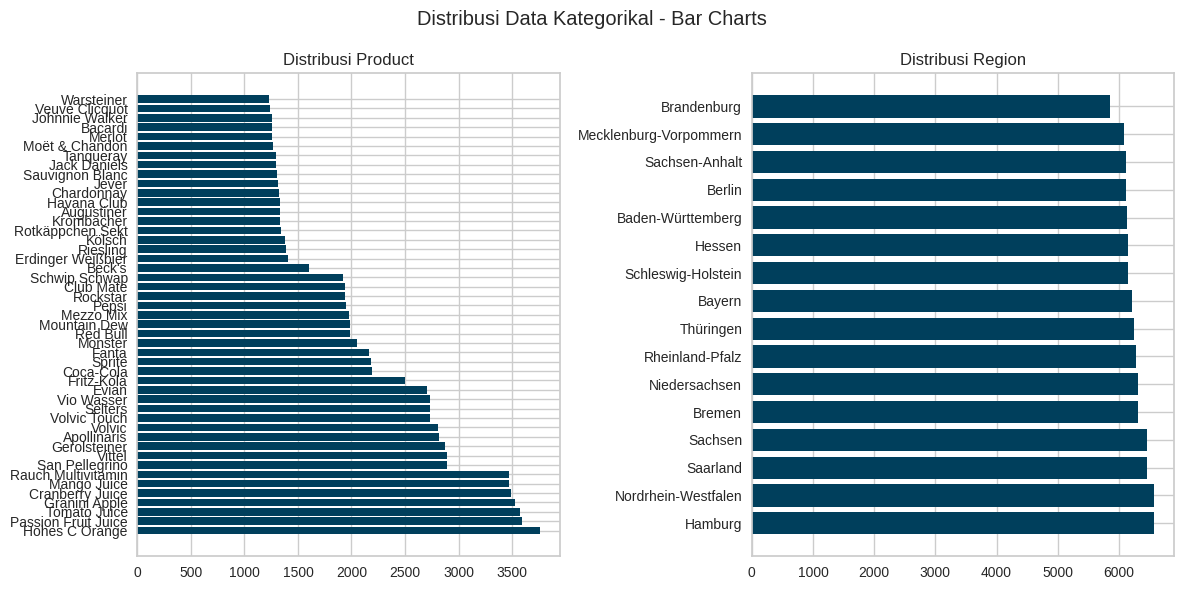

In [14]:
# Bar chart distribusi product & distribusi region
product_count = df['Product'].value_counts()
region_count = df['Region'].value_counts()

# Warna yang digunakan
bar_color = '#003f5c'

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].barh(product_count.index, product_count.values, color=bar_color)
ax[0].set_title("Distribusi Product")
ax[1].barh(region_count.index, region_count.values, color=bar_color)
ax[1].set_title("Distribusi Region")
plt.suptitle("Distribusi Data Kategorikal - Bar Charts")
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 5.1 Menghapus atau Menangani Data Kosong (Missing Values)

In [15]:
# Mengecek jumlah data yang hilang di setiap kolom
df.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


## 5.2 Menghapus Data Duplikat

In [16]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


## 5.3 Normalisasi atau Standarisasi Fitur

In [17]:
# Inisialisasi scaler untuk standarisasi dan normalisasi
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Salin DataFrame
df_transformed = df.copy()

# Terapkan standarisasi (Standard Scaling) pada kolom Total_Price dan Unit_Price
df_transformed[['Total_Price', 'Unit_Price']] = scaler_standard.fit_transform(
    df_transformed[['Total_Price', 'Unit_Price']]
)

# Terapkan normalisasi (Min-Max Scaling) pada kolom Quantity
df_transformed[['Quantity']] = scaler_minmax.fit_transform(df_transformed[['Quantity']])

# Tampilkan beberapa baris pertama hasil transformasi
df_transformed.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.325266,0.060606,0.00,-0.239013,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.347942,0.454545,0.10,-0.196837,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,-0.197455,0.727273,0.05,0.130723,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.212572,0.292929,0.05,-0.107203,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.334199,0.020202,0.00,-0.247692,Hessen,2023-04-28


## 5.4 Deteksi dan Penanganan Outlier

Jumlah data sebelum proses penghapusan outlier: 100000


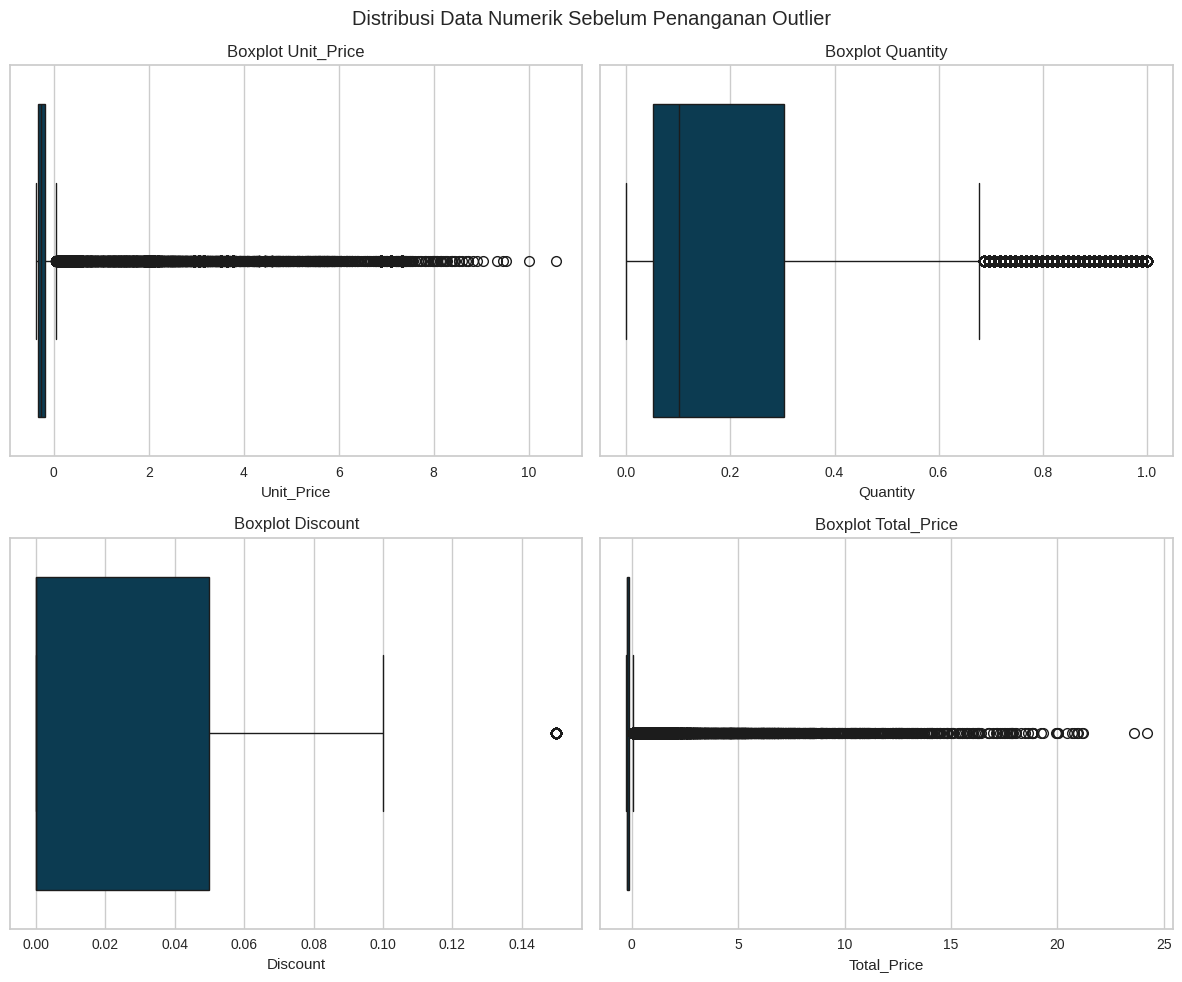

In [18]:
# Menentukan kolom numerik untuk analisis outlier
numeric_col = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']

# Menghitung kuartil pertama (Q1), kuartil ketiga (Q3), dan selisih interkuartil (IQR)
Q1 = df_transformed[numeric_col].quantile(0.25)
Q3 = df_transformed[numeric_col].quantile(0.75)
IQR = Q3 - Q1

# Menentukan ambang batas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Jumlah data sebelum proses penghapusan outlier: {df_transformed.shape[0]}")

# Visualisasi boxplot sebelum menghapus outlier
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(numeric_col):
    ax = axes[i // 2, i % 2]
    sns.boxplot(x=df_transformed[col], ax=ax, color='#003f5c')
    ax.set_title(f'Boxplot {col}')

plt.suptitle("Distribusi Data Numerik Sebelum Penanganan Outlier")
plt.tight_layout()
plt.show()

Jumlah data setelah proses penghapusan outlier: 75948


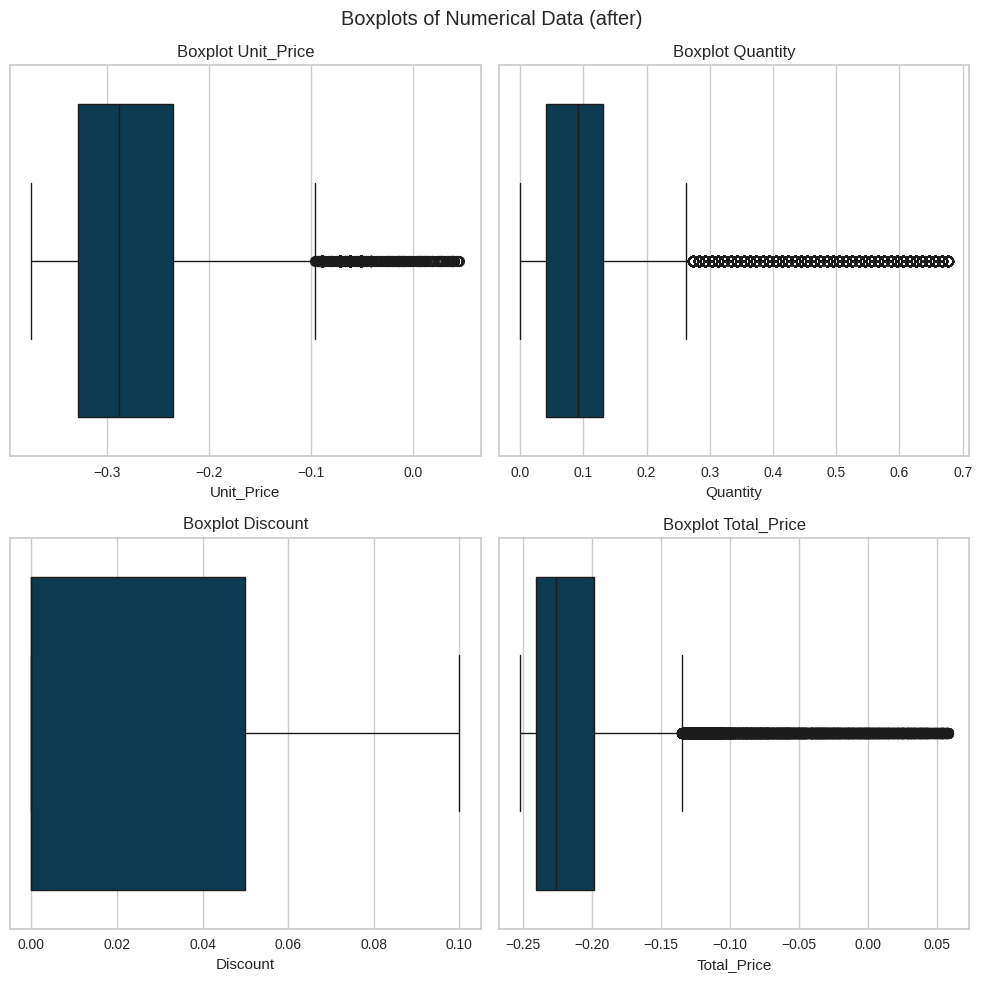

In [19]:
# Identifikasi baris yang tidak mengandung outlier berdasarkan batas bawah dan atas
outlier_mask = ~((df_transformed[numeric_col] < lower_bound) | (df_transformed[numeric_col] > upper_bound)).any(axis=1)
df_cleaned = df_transformed[outlier_mask]

print("Jumlah data setelah proses penghapusan outlier:", df_cleaned.shape[0])

# Visualisasi boxplot setelah menghapus outlier
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, col in enumerate(numeric_col):
    ax = axes[i//2, i%2]
    sns.boxplot(x=df_cleaned[col], ax=ax, color='#003f5c')
    ax.set_title(f'Boxplot {col}')

plt.suptitle("Boxplots of Numerical Data (after)")
plt.tight_layout()
plt.show()

## 5.5 Encoding Data Kategorikal

In [20]:
# Salin dataframe yang telah dibersihkan dari Outlier
df_labeled = df_cleaned.copy()

# Inisialisasi dictionary untuk menyimpan encoder tiap kolom
label_encoders = {}

# 1. One-Hot Encoding untuk 'Customer_Type' (karena jumlah kategorinya sedikit)
df_labeled = pd.get_dummies(df_labeled, columns=['Customer_Type'])

# Ubah Customer_Type_B2B dan Customer_Type_B2C dari False/True ke 0/1
df_labeled["Customer_Type_B2B"] = df_labeled["Customer_Type_B2B"].astype(int)
df_labeled["Customer_Type_B2C"] = df_labeled["Customer_Type_B2C"].astype(int)

# 2. Label Encoding untuk kolom kategori ('Category', 'Product', 'Region')
categorical_col = ['Category', 'Product', 'Region']
for col in categorical_col:
    # Inisialisasi LabelEncoder
    le = LabelEncoder()
    df_labeled[col] = le.fit_transform(df_labeled[col]) # Encoding kolom
    label_encoders[col] = le # Simpan encoder untuk inverse nanti

# Menampilkan 5 baris pertama dari dataframe yang telah diencoding
df_labeled.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C
0,ORD697566,CUS6363,5,2,-0.325266,0.060606,0.00,-0.239013,4,2021-02-17,0,1
1,ORD1118443,CUS7797,32,3,-0.347942,0.454545,0.10,-0.196837,13,2023-04-15,1,0
3,ORD1437128,CUS6393,20,2,-0.212572,0.292929,0.05,-0.107203,14,2021-09-07,1,0
4,ORD562794,CUS4090,29,3,-0.334199,0.020202,0.00,-0.247692,6,2023-04-28,0,1
5,ORD2320519,CUS5936,2,0,-0.299841,0.030303,0.00,-0.242141,4,2023-11-01,0,1


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [21]:
# Memilih fitur untuk clustering
features = ["Unit_Price", "Quantity", "Discount", "Total_Price", "Customer_Type_B2B", "Customer_Type_B2C"]

# Menyiapkan data untuk clustering
X = df_labeled[features]
X

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type_B2B,Customer_Type_B2C
0,-0.325266,0.060606,0.00,-0.239013,0,1
1,-0.347942,0.454545,0.10,-0.196837,1,0
3,-0.212572,0.292929,0.05,-0.107203,1,0
4,-0.334199,0.020202,0.00,-0.247692,0,1
5,-0.299841,0.030303,0.00,-0.242141,0,1
...,...,...,...,...,...,...
99992,-0.241433,0.131313,0.00,-0.192545,0,1
99993,-0.287472,0.050505,0.00,-0.234702,0,1
99995,-0.317020,0.050505,0.00,-0.239623,0,1
99997,-0.353439,0.000000,0.00,-0.251698,0,1


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

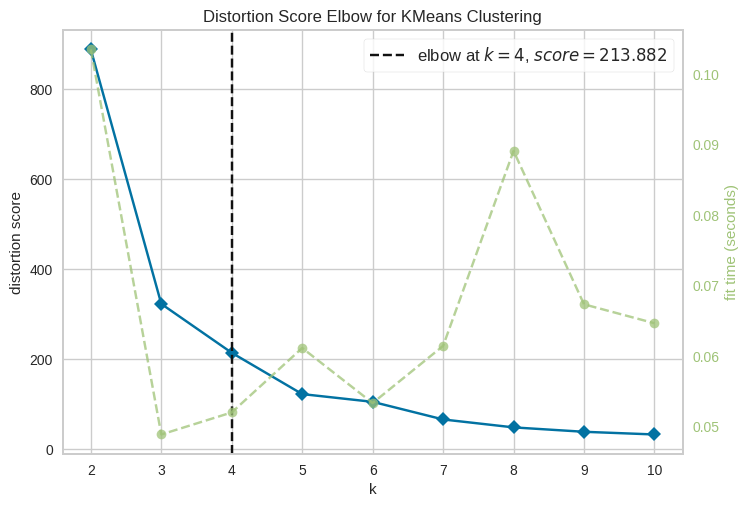

Silhouette Score untuk KMeans dengan K=4: 0.865686355985184


In [22]:
## **Evaluasi Model Clustering Sebelum Feature Selection**

# 1. Clustering dengan fitur yang telah dipilih
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 2. # Elbow Method sebelum Feature Selection
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 11))
visualizer.fit(X_pca)
visualizer.show()

# 3. Ambil k optimal sebelum Feature Selection
optimal_k = visualizer.elbow_value_

# 4. Clustering dengan K-Means sebelum Feature Selection
kmeans = KMeans(n_clusters=optimal_k, random_state=69, init='k-means++')
kmeans.fit(X_pca)

# 5. Hitung Silhouette Score sebelum Feature Selection
sil_score = silhouette_score(X_pca, kmeans.labels_)
print(f'Silhouette Score untuk KMeans dengan K={optimal_k}: {sil_score}')

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

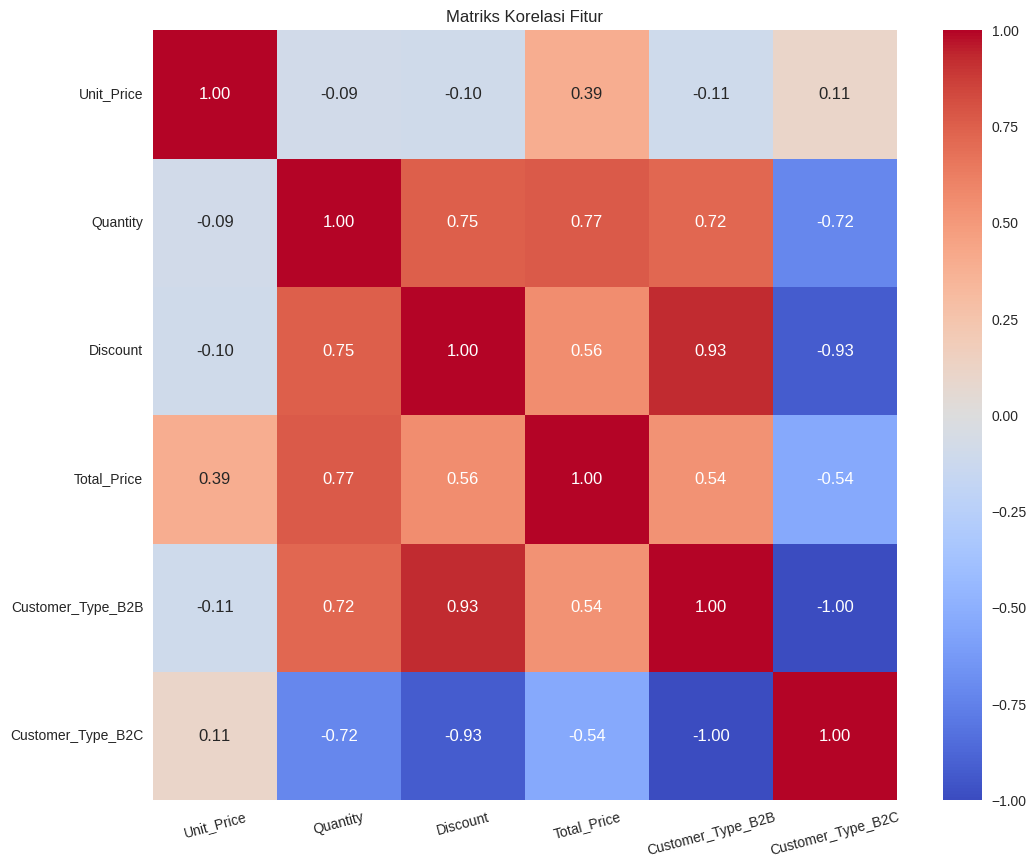

In [23]:
# Membuat heatmap untuk menampilkan korelasi
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=15)
plt.title('Matriks Korelasi Fitur')
plt.show()

In [24]:
# Hapus salah satu fitur dari pasangan fitur dengan korelasi tinggi (Threshold > 0.80)
threshold = 0.80

# Menyimpan fitur yang dihapus
high_corr_features = set()

# Identifikasi fitur yang memiliki korelasi tinggi
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

# Hapus fitur dengan korelasi tinggi
X_selected = X.drop(columns=high_corr_features)

# Tampilkan hasil
print("Fitur yang dihapus:", high_corr_features)
print("Fitur setelah menghapus korelasi tinggi:", X_selected.columns.tolist())

Fitur yang dihapus: {'Customer_Type_B2C', 'Customer_Type_B2B'}
Fitur setelah menghapus korelasi tinggi: ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']


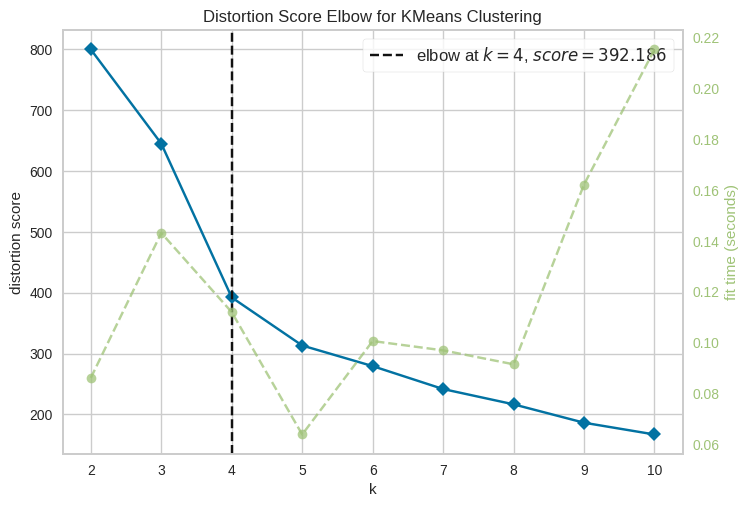

In [25]:
## **Evaluasi Model Clustering Setelah Feature Selection**

# 1. Clustering dengan fitur yang telah dipilih
X_selected_pca = PCA(n_components=2).fit_transform(X_selected)

# 2. # Elbow Method setelah Feature Selection
kmeans_selected = KMeans()
visualizer_selected = KElbowVisualizer(kmeans_selected, k=(2, 11))
visualizer_selected.fit(X_selected_pca)
visualizer_selected.show()

# 3. Ambil k optimal setelah Feature Selection
optimal_k_selected = visualizer_selected.elbow_value_

# 4. Clustering dengan K-Means setelah Feature Selection
kmeans_selected = KMeans(n_clusters=optimal_k_selected, random_state=69, init='k-means++')
kmeans_selected.fit(X_selected_pca)

# 5. Hitung Silhouette Score setelah Feature Selection
sil_score_selected = silhouette_score(X_selected_pca, kmeans_selected.labels_)

In [26]:
print(f'Silhouette Score sebelum Feature Selection untuk KMeans dengan K={optimal_k}: {sil_score}')
print(f'Silhouette Score setelah Feature Selection untuk KMeans dengan K={optimal_k_selected}: {sil_score_selected}')

Silhouette Score sebelum Feature Selection untuk KMeans dengan K=4: 0.865686355985184
Silhouette Score setelah Feature Selection untuk KMeans dengan K=4: 0.46082770092323255


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

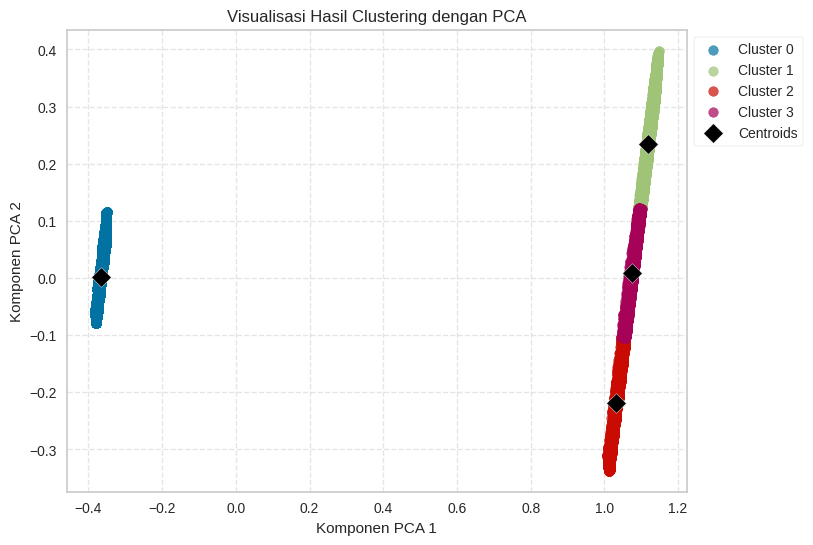

In [27]:
# Visualisasi Hasil Clustering
plt.figure(figsize=(8, 6))

# Loop untuk memplot setiap cluster dengan warna berbeda
for cluster_id in range(optimal_k):
    cluster_points = X_pca[kmeans.labels_ == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', alpha=0.7)

# Plot centroid cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', marker='D', s=100, edgecolors='white', label='Centroids')

# Menambahkan elemen pada plot
plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [28]:
# Tambahkan label hasil clustering ke dalam DataFrame
df_labeled['Cluster'] = kmeans.labels_
df_labeled.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C,Cluster
0,ORD697566,CUS6363,5,2,-0.325266,0.060606,0.00,-0.239013,4,2021-02-17,0,1,0
1,ORD1118443,CUS7797,32,3,-0.347942,0.454545,0.10,-0.196837,13,2023-04-15,1,0,3
3,ORD1437128,CUS6393,20,2,-0.212572,0.292929,0.05,-0.107203,14,2021-09-07,1,0,3
4,ORD562794,CUS4090,29,3,-0.334199,0.020202,0.00,-0.247692,6,2023-04-28,0,1,0
5,ORD2320519,CUS5936,2,0,-0.299841,0.030303,0.00,-0.242141,4,2023-11-01,0,1,0


In [29]:
# Kembalikan data numerik ke skala aslinya sebelum normalisasi atau standarisasi

df_labeled[['Total_Price', 'Unit_Price']] = scaler_standard.inverse_transform(df_labeled[['Total_Price', 'Unit_Price']])
df_labeled[['Quantity']] = scaler_minmax.inverse_transform(df_labeled[['Quantity']])
df_labeled.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C,Cluster
0,ORD697566,CUS6363,5,2,1.04,7.0,0.00,7.28,4,2021-02-17,0,1,0
1,ORD1118443,CUS7797,32,3,0.71,46.0,0.10,29.39,13,2023-04-15,1,0,3
3,ORD1437128,CUS6393,20,2,2.68,30.0,0.05,76.38,14,2021-09-07,1,0,3
4,ORD562794,CUS4090,29,3,0.91,3.0,0.00,2.73,6,2023-04-28,0,1,0
5,ORD2320519,CUS5936,2,0,1.41,4.0,0.00,5.64,4,2023-11-01,0,1,0


In [30]:
# Kembalikan data kategorikal menjadi semula sebelum dilabelisasi

# Gunakan encoder yang disimpan sebelumnya untuk inverse_transform
for col in categorical_col:
    df_labeled[col] = label_encoders[col].inverse_transform(df_labeled[col])

# Mengembalikan Customer_Type dari One-Hot Encoding
df_labeled['Customer_Type'] = df_labeled.apply(lambda row: 'B2B' if row['Customer_Type_B2B'] == 1 else 'B2C', axis=1)

# Hapus kolom One-Hot Encoding karena sudah dikembalikan ke bentuk aslinya
df_labeled = df_labeled.drop(columns=['Customer_Type_B2B', 'Customer_Type_B2C'])

# Menampilkan hasil
df_labeled.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster,Customer_Type
0,ORD697566,CUS6363,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,0,B2C
1,ORD1118443,CUS7797,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,3,B2B
3,ORD1437128,CUS6393,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,3,B2B
4,ORD562794,CUS4090,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,0,B2C
5,ORD2320519,CUS5936,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,0,B2C


In [31]:
# Memindahkan Customer_Type ke posisi ke-3 (index = 2)
customer_type_col = df_labeled.pop('Customer_Type')  # Menghapus sementara
df_labeled.insert(2, 'Customer_Type', customer_type_col)  # Menyisipkan ke index ke-2

df_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,3
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,3
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,0
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,0


In [32]:
# Membuat ringkasan jumlah Customer_Type dalam setiap Cluster
df_summary = df_labeled.groupby(['Cluster', 'Customer_Type']).size().unstack(fill_value=0)

df_summary.index.name = 'Cluster'
df_summary.columns.name = None

display(df_summary)

,B2B,B2C
Cluster,,
0,0,56636
1,5831,0
2,6877,0
3,6604,0


In [33]:
# Menghitung rata-rata nilai fitur numerik untuk setiap Cluster
df_labeled.select_dtypes(include=['number']).groupby('Cluster').mean()

,Unit_Price,Quantity,Discount,Total_Price
Cluster,,,,
0,1.844884,7.988188,0.000000,14.748905
1,1.625586,55.823701,0.078760,82.099283
2,1.532740,11.820125,0.059721,16.249724
3,1.608660,33.914749,0.066626,49.194571


**Analisis Karakteristik Cluster**
1.   **Cluster 0**:
  - **Tipe Pelanggan (Customer Type): B2C**
  - **Rata-Rata Harga Per Unit (Unit Price): 1.84**
  - **Rata-Rata Jumlah Pembelian (Quantity): 7.99**
  - **Rata-Rata Diskon (Discount): 0%**
  - **Rata-Rata Harga Total (Total Price): 14.75**
  - Analisis: Cluster 0 terdiri dari pelanggan B2C dengan rata-rata harga per unit sebesar 1.84, rata-rata jumlah pembelian 7.99, tanpa diskon, dan rata-rata harga total 14.75. Hal ini menunjukkan bahwa pelanggan dalam cluster ini cenderung melakukan pembelian dalam jumlah sedikit dengan harga unit yang relatif lebih tinggi dibandingkan dengan cluster lainnya dan tidak mendapatkan diskon. Mereka mungkin merupakan pelanggan yang membeli produk untuk kebutuhan pribadi atau dalam skala kecil.

2.   **Cluster 1**:
  - **Tipe Pelanggan (Customer Type): B2B**
  - **Rata-Rata Harga Per Unit (Unit Price): 1.62**
  - **Rata-Rata Jumlah Pembelian (Quantity): 55.82**
  - **Rata-Rata Diskon (Discount): 7.88%**
  - **Rata-Rata Harga Total (Total Price): 14.75**
  - Analisis: Cluster 1 terdiri dari pelanggan B2B dengan rata-rata harga per unit 1.62, rata-rata jumlah pembelian yang sangat tinggi yaitu 55.82, dan diskon rata-rata 7.88%. Total harga rata-rata adalah 14.75. Karakteristik cluster ini menunjukkan bahwa pelanggan B2B dalam cluster ini melakukan pembelian dalam jumlah besar, mendapatkan diskon yang signifikan, dan harga total per pembelian relatif rendah. Mereka kemungkinan merupakan perusahaan atau organisasi yang melakukan pembelian dalam skala besar untuk keperluan bisnis mereka.

3.   **Cluster 2**:
  - **Tipe Pelanggan (Customer Type): B2B**
  - **Rata-Rata Harga Per Unit (Unit Price): 1.53**
  - **Rata-Rata Jumlah Pembelian (Quantity): 11.82**
  - **Rata-Rata Diskon (Discount): 5.97%**
  - **Rata-Rata Harga Total (Total Price): 16.25**
  - Analisis: Cluster 2 juga terdiri dari pelanggan B2B dengan rata-rata harga per unit 1.53, rata-rata jumlah pembelian 11.82, dan diskon rata-rata 5.97%. Total harga rata-rata adalah 16.25. Cluster ini juga menunjukkan pelanggan B2B, tetapi dengan volume pembelian yang lebih rendah dibandingkan Cluster 1, dan diskon yang diberikan juga lebih rendah. Hal ini menunjukkan bahwa mereka mungkin merupakan pelanggan B2B yang melakukan pembelian dalam skala menengah dengan mendapatkan diskon yang lebih rendah daripada cluster 1.

4.   **Cluster 3**:
  - **Tipe Pelanggan (Customer Type): B2B**
  - **Rata-Rata Harga Per Unit (Unit Price): 1.61**
  - **Rata-Rata Jumlah Pembelian (Quantity): 33.91**
  - **Rata-Rata Diskon (Discount): 6.66%**
  - **Rata-Rata Harga Total (Total Price): 49.19**
  - Analisis: Cluster 3 terdiri dari pelanggan B2B dengan rata-rata harga per unit 1.61, rata-rata jumlah pembelian 33.91, dan diskon rata-rata 6.66%. Total harga rata-rata adalah 49.19. Cluster ini menunjukkan pelanggan B2B dengan volume pembelian yang tinggi, mendapatkan diskon yang moderat, dan rata-rata total harga per pembelian yang lebih tinggi dibandingkan Cluster 1 dan 2. Kemungkinan mereka melakukan pembelian dalam skala besar untuk keperluan bisnis dan mendapatkan diskon yang lebih besar daripada cluster 2, tetapi lebih rendah daripada cluster 1.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [34]:
# Simpan dataframe ke dalam file CSV
df_labeled.to_csv('Dataset_clustering.csv', index=False)